Problem 1- Service Data set(One way ANOVA)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

Loading the data set

In [22]:
df=pd.read_csv('/content/Service_ANOVA.csv')

Viewing the top 10 records, shape,information & summery

In [23]:
df.head(10)

,Technician,Manufacturer,Job,Service_Time
0,1,1,1,62
1,1,1,2,48
2,1,1,3,63
3,1,1,4,57
4,1,1,5,69
5,1,2,1,57
6,1,2,2,45
7,1,2,3,39
8,1,2,4,54
9,1,2,5,44


In [24]:
df.shape

(45, 4)

In [25]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Technician    45 non-null     int64
 1   Manufacturer  45 non-null     int64
 2   Job           45 non-null     int64
 3   Service_Time  45 non-null     int64
dtypes: int64(4)
memory usage: 1.5 KB


In [26]:
df.describe(include='all')

,Technician,Manufacturer,Job,Service_Time
count,45.000000,45.000000,45.000000,45.000000
mean,2.000000,2.000000,3.000000,55.822222
std,0.825723,0.825723,1.430194,8.448477
min,1.000000,1.000000,1.000000,39.000000
25%,1.000000,1.000000,2.000000,50.000000
50%,2.000000,2.000000,3.000000,56.000000
75%,3.000000,3.000000,4.000000,62.000000
max,3.000000,3.000000,5.000000,70.000000


In [27]:
df.isnull().sum() # There are no missing values in the data

Technician      0
Manufacturer    0
Job             0
Service_Time    0
dtype: int64

In [28]:
df.Technician.value_counts()

1    15
2    15
3    15
Name: Technician, dtype: int64

In [29]:
df.Manufacturer.value_counts()

1    15
2    15
3    15
Name: Manufacturer, dtype: int64

Formulate the Null and Alternate Hypothesis(For Manufacturer)
1.1 State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘Manufacturer’ and ‘Technician individually..

Null and Alternate hypothesis with respect to Manufacturer

H0 = There is no significance difference in service time means due to Manufacturer

H1 = There is significance difference in service time means due to Manufacturer

Null and Alternate hypothesis with respect to Technician

H0 = There is no significance difference in service time means due to Technician

H1 = There is significance difference in service time means due to Technician


2. Perform one-way ANOVA for variable ‘Manufacturer’ with respect to the variable ‘Service
Time’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results. -

In [30]:
print(anova_lm(ols('Manufacturer ~ C(Service_Time)', df).fit()))

                   df     sum_sq   mean_sq         F    PR(>F)
C(Service_Time)  24.0  14.333333  0.597222  0.762411  0.739253
Residual         20.0  15.666667  0.783333       NaN       NaN


The P value is greater than 0.05 which means we can reject the null hypothesis with 95%confidence level. There is significance difference in service time means with respect to themanufacture

3. Perform one-way ANOVA for variable ‘Technician’ with respect to the variable ‘Service
Time’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [31]:
print(anova_lm(ols('Technician ~ C(Service_Time)', df).fit()))

                   df     sum_sq   mean_sq         F    PR(>F)
C(Service_Time)  24.0  14.166667  0.590278  0.745614  0.755742
Residual         20.0  15.833333  0.791667       NaN       NaN


The P value is greater than 0.05 which means we can reject the null hypothesis with 95%confidence level. There is significance difference in service time means with respect to theTechnicians

4. Analyse the effects of one variable on another with the help of an interaction plot. What is an
interaction between two treatments?

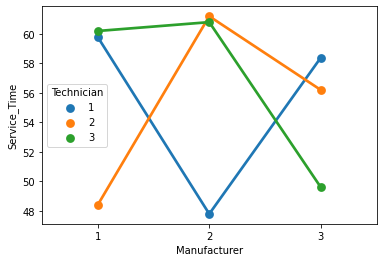

In [36]:
sns.pointplot(x='Manufacturer', y='Service_Time', data=df, hue='Technician', ci=None)

5) Perform a two-way ANOVA based on the variables ‘Manufacturer’ & ‘Technician’ with
respect to the variable ‘Service Time’ and state your results.:

In [37]:
formula = 'Service_Time ~ C(Manufacturer) + C(Technician)+ C(Manufacturer): C(Technician)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                                 df       sum_sq     mean_sq         F  \
C(Manufacturer)                 2.0    28.311111   14.155556  0.272164   
C(Technician)                   2.0    24.577778   12.288889  0.236274   
C(Manufacturer):C(Technician)   4.0  1215.288889  303.822222  5.841487   
Residual                       36.0  1872.400000   52.011111       NaN   

                                 PR(>F)  
C(Manufacturer)                0.763283  
C(Technician)                  0.790779  
C(Manufacturer):C(Technician)  0.000994  
Residual                            NaN  


The P value of combination is less than 0.05 which means we may have to accept the nullhypothesis with two variables. That means there is no significance difference in service time means with respect to the Technicians & Manufacturer together